# Scattering rate calculations.

Santi

24 January 2026

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# constants
h = 6.62607015e-34  # Planck's constant in J*s
hbar = h / (2 * np.pi)  # reduced Planck's constant
c = 299792458  # speed of light in m/s
epsilon_0 = 8.854187817e-12  # vacuum permittivity in F/m
a0 = 5.29177210903e-11  # Bohr radius in meters
e = 1.602176634e-19  # elementary charge in Coulombs
me = 9.10938356e-31  # electron mass in kg
kB = 1.380649e-23  # Boltzmann constant in J/K

# Cs information
Cs_D1_wavelength = 894.592959e-9  # Cs D1 line wavelength in meters
Cs_D1_gamma = 2*np.pi*4.5612e6 # Cs D1 line natural linewidth in Hz
Cs_D1_pi_Isat = 2.4981*10  # Cs D1 line pi-polarized saturation intensity in W/m^2

Cs_D2_wavelength = 852.34727582e-9  # Cs D2 line wavelength in meters
Cs_D2_gamma = 2*np.pi*5.2227e6 # Cs D2 line natural linewidth in Hz
Cs_D2_pi_Isat = 1.6536*10  # Cs D2 line pi-polarized saturation intensity in W/m^2
Cs_D2_iso_Isat = 2.7059*10  # Cs D2 line isotropic saturation intensity in W/m^2
Cs_D2_sigma_Isat = 1.1023*10  # Cs D2 line sigma-polarized saturation intensity in W/m^2

# Rb information
Rb_D1_wavelength = 794.978850e-9      # Rb D1 line wavelength in meters
Rb_D1_gamma = 2*np.pi*5.746e6 # Rb D1 line natural linewidth in Hz
Rb_D1_pi_Isat = 4.484*10  # Rb D1 line pi-polarized saturation intensity in W/m^2

Rb_D2_wavelength = 780.241209686e-9  # Rb D2 line wavelength in meters
Rb_D2_gamma = 2*np.pi*6.065e6 # Rb D2 line natural linewidth in Hz
Rb_D2_pi_Isat = 2.503*10  # Rb D2 line pi-polarized saturation intensity in W/m^2
Rb_D2_iso_Isat = 3.576*10  # Rb D2 line isotropic saturation intensity in W/m^2
Rb_D2_sigma_Isat = 1.669*10  # Rb D2 line sigma-polarized saturation intensity in W/m^2

In [62]:
def calc_scattering_rate(I, I_sat, delta, gamma):
    """
    Calculate the scattering rate of an atom given the laser intensity,
    saturation intensity, detuning, and natural linewidth.

    Parameters:
    I (float): Laser intensity
    I_sat (float): Saturation intensity
    delta (float): Detuning from resonance (in Hz)
    gamma (float): Natural linewidth of the transition (in Hz)

    Returns:
    float: Scattering rate (in Hz)
    """
    s = I / I_sat  # Saturation parameter
    scattering_rate = (gamma / 2) * (s / (1 + s + (2 * delta / gamma) ** 2))
    return scattering_rate

def Gaussian_beam_peak_intensity(P, w):
    """ calculate Gaussian beam peak intensity with beam size w"""
    intensity = 2 * P / (np.pi * w**2) # peak intensity
    return intensity

Laser Power: 2 W
Beam Waist: 180.0 um
Peak Intensity: 392975168128.14 W/m^2
Cs D2 Saturation Intensity (isotropic): 27.059 W/m^2
Rb D2 Saturation Intensity (isotropic): 35.76 W/m^2


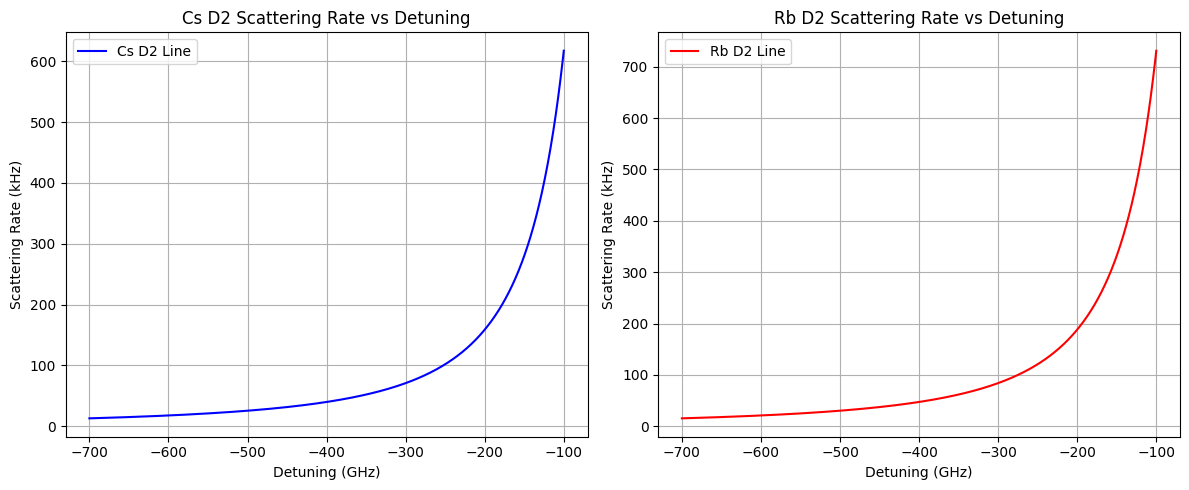

In [63]:
# plot the scattering rate as a function of detuning for Cs and Rb D2 line
detunings = np.linspace(-700e9, -100e9, 1000)  # Detunings from -700 GHz to -100 GHz
waist = 180e-6  # Beam waist in meters
power = 2  # Laser power in Watts

intensity = Gaussian_beam_peak_intensity(power, waist)  # Calculate peak intensity (W/m^2)

Cs_scattering_rates = calc_scattering_rate(intensity, Cs_D2_iso_Isat, detunings, Cs_D2_gamma)  # Cs scattering rates (Hz)
Rb_scattering_rates = calc_scattering_rate(intensity, Rb_D2_iso_Isat, detunings, Rb_D2_gamma)  # Rb scattering rates (Hz)

# print out the parameters used
print(f"Laser Power: {power} W")
print(f"Beam Waist: {waist*1e6} um")
print(f"Peak Intensity: {intensity*1e4:.2f} W/m^2")
print(f"Cs D2 Saturation Intensity (isotropic): {Cs_D2_iso_Isat} W/m^2")
print(f"Rb D2 Saturation Intensity (isotropic): {Rb_D2_iso_Isat} W/m^2")

# create a side-by-side plot for each  (detuning (GHz) vs scattering rate (kHz))
# do not write axis labels in scientific notation
plt.rcParams['axes.formatter.useoffset'] = False
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(detunings*1e-9, Cs_scattering_rates*1e-3, label='Cs D2 Line', color='blue')
ax1.set_title('Cs D2 Scattering Rate vs Detuning')
ax1.set_xlabel('Detuning (GHz)')
ax1.set_ylabel('Scattering Rate (kHz)')
ax1.grid()
ax1.legend()
ax2.plot(detunings*1e-9, Rb_scattering_rates*1e-3, label='Rb D2 Line', color='red')
ax2.set_title('Rb D2 Scattering Rate vs Detuning')
ax2.set_xlabel('Detuning (GHz)')
ax2.set_ylabel('Scattering Rate (kHz)')
ax2.grid()
ax2.legend()
plt.tight_layout()
plt.show()


Laser Power: 0.1 W
Beam Waist: 100.0 um
Peak Intensity: 63661977236.76 W/m^2
Cs D1 Saturation Intensity (pi): 24.981 W/m^2
Rb D1 Saturation Intensity (pi): 44.84 W/m^2


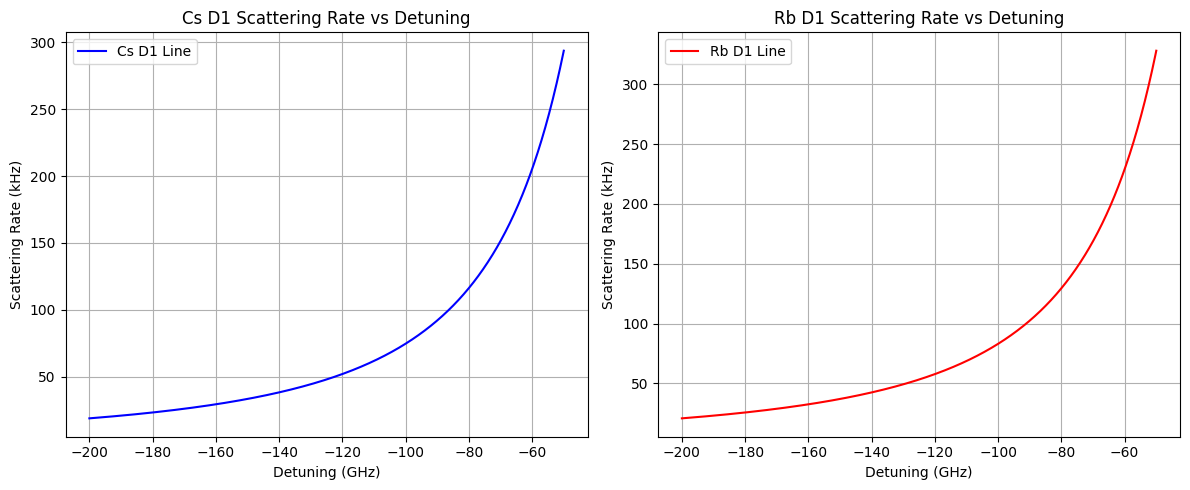

In [64]:
# now the same thing for D1 line
detunings = np.linspace(-200e9, -50e9, 1000)  # Detunings from -700 GHz to -100 GHz
waist = 100e-6  # Beam waist in meters
power = 0.1  # Laser power in Watts

intensity = Gaussian_beam_peak_intensity(power, waist)  # Calculate peak intensity


Cs_scattering_rates_D1 = calc_scattering_rate(intensity, Cs_D1_pi_Isat, detunings, Cs_D1_gamma)  # Cs D1 scattering rates
Rb_scattering_rates_D1 = calc_scattering_rate(intensity, Rb_D1_pi_Isat, detunings, Rb_D1_gamma)  # Rb D1 scattering rates

# print out the parameters used
print(f"Laser Power: {power} W")
print(f"Beam Waist: {waist*1e6} um")
print(f"Peak Intensity: {intensity*1e4:.2f} W/m^2")
print(f"Cs D1 Saturation Intensity (pi): {Cs_D1_pi_Isat} W/m^2")
print(f"Rb D1 Saturation Intensity (pi): {Rb_D1_pi_Isat} W/m^2")

# create a side-by-side plot for each  (detuning (GHz) vs scattering rate (kHz))
# do not write axis labels in scientific notation
plt.rcParams['axes.formatter.useoffset'] = False
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(detunings*1e-9, Cs_scattering_rates_D1*1e-3, label='Cs D1 Line', color='blue')
ax1.set_title('Cs D1 Scattering Rate vs Detuning')
ax1.set_xlabel('Detuning (GHz)')
ax1.set_ylabel('Scattering Rate (kHz)')
ax1.grid()
ax1.legend()

ax2.plot(detunings*1e-9, Rb_scattering_rates_D1*1e-3, label='Rb D1 Line', color='red')
ax2.set_title('Rb D1 Scattering Rate vs Detuning')
ax2.set_xlabel('Detuning (GHz)')
ax2.set_ylabel('Scattering Rate (kHz)')
ax2.grid()
ax2.legend()
plt.tight_layout()
plt.show()